In [1]:
import sys, os, boto3
import rasterio

import geopandas as gpd
import pandas as pd

from tqdm.notebook import tqdm
from shapely.geometry import box

sys.path.insert(0,"/home/wb411133/Code/gostrocks/src")

import GOSTRocks.rasterMisc as rMisc
import GOSTRocks.dataMisc as dataMisc
import GOSTRocks.mapMisc as mapMisc

/home/wb411133/.conda/envs/ee/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [28]:
s3_bucket = 'wbg-geography01'
s3_prefix = 'FATHOM/v2023/'

s3 = boto3.resource('s3')
s3_downloader = boto3.client('s3')

In [3]:
fathom_tile_extents = 's3://wbg-geography01/FATHOM/v2023_support_files/fathom_tile_extents.geojson'
fathom_extents = gpd.read_file(fathom_tile_extents)

In [50]:
# define extent by iso3 code
sel_iso3 = 'MWI'
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
sel_bounds = world.loc[world['iso_a3'] == sel_iso3].unary_union

In [46]:
# Define extent by bounding box [minx, miny, maxx, maxy]
#bbox = [176.058746,-10.791870,179.871353,-5.642500]
#sel_bounds = box(*bbox)

In [51]:
# select tiles that intersect the sel_bounds
sel_tiles = fathom_extents.loc[fathom_extents.intersects(sel_bounds)]

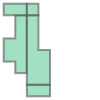

In [52]:
sel_tiles.unary_union

In [54]:
sel_tiles.shape

(21, 4)

# Select flooding layer

In [55]:
### TODO - this section add projections options
return_period = '1000'
defended = 'DEFENDED'

coastal_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-COASTAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'
fluvial_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-FLUVIAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'
pluvial_folder = f'GLOBAL-1ARCSEC-NW_OFFSET-1in{return_period}-PLUVIAL-{defended}-DEPTH-2020-PERCENTILE50-v3.0'

download_folder = '/home/wb411133/temp/FATHOM/TESTING_Download_Malawi'
for c_folder in [coastal_folder, fluvial_folder, pluvial_folder]:
    out_folder = os.path.join(download_folder, c_folder)
    try:
        os.makedirs(out_folder)
    except:
        pass

for idx, row in sel_tiles.iterrows():        
    tiff = f'{row["ID"]}.tif'
    for c_folder in [coastal_folder, fluvial_folder, pluvial_folder]:
        try:
            s3_downloader.download_file(s3_bucket, 
                     os.path.join(s3_prefix, c_folder, tiff), 
                     os.path.join(download_folder, c_folder, tiff))
        except:
            print(f'Error downloading {tiff} for {c_folder}')
    

Error downloading s10e034.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s10e032.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s10e033.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s11e034.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s11e033.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s12e034.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s12e033.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s13e033.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-PERCENTILE50-v3.0
Error downloading s13e034.tif for GLOBAL-1ARCSEC-NW_OFFSET-1in1000-COASTAL-DEFENDED-DEPTH-2020-P